# **ศูนย์ EV ครบวงจร กลุ่มอุตสาหกรรมยานยนต์ โดย พรรคที่จะล้อม**

6309681556 นางสาว เปมิกา ศรีโมรา  (ผู้ประสานงานกลุ่ม)

6309680012 นาย ธารดา เอื้อวงษ์ 

6309610183 นาย นิธาน สุขอัมพร 

6309681093 นางสาว อชิรญา สันติสุข

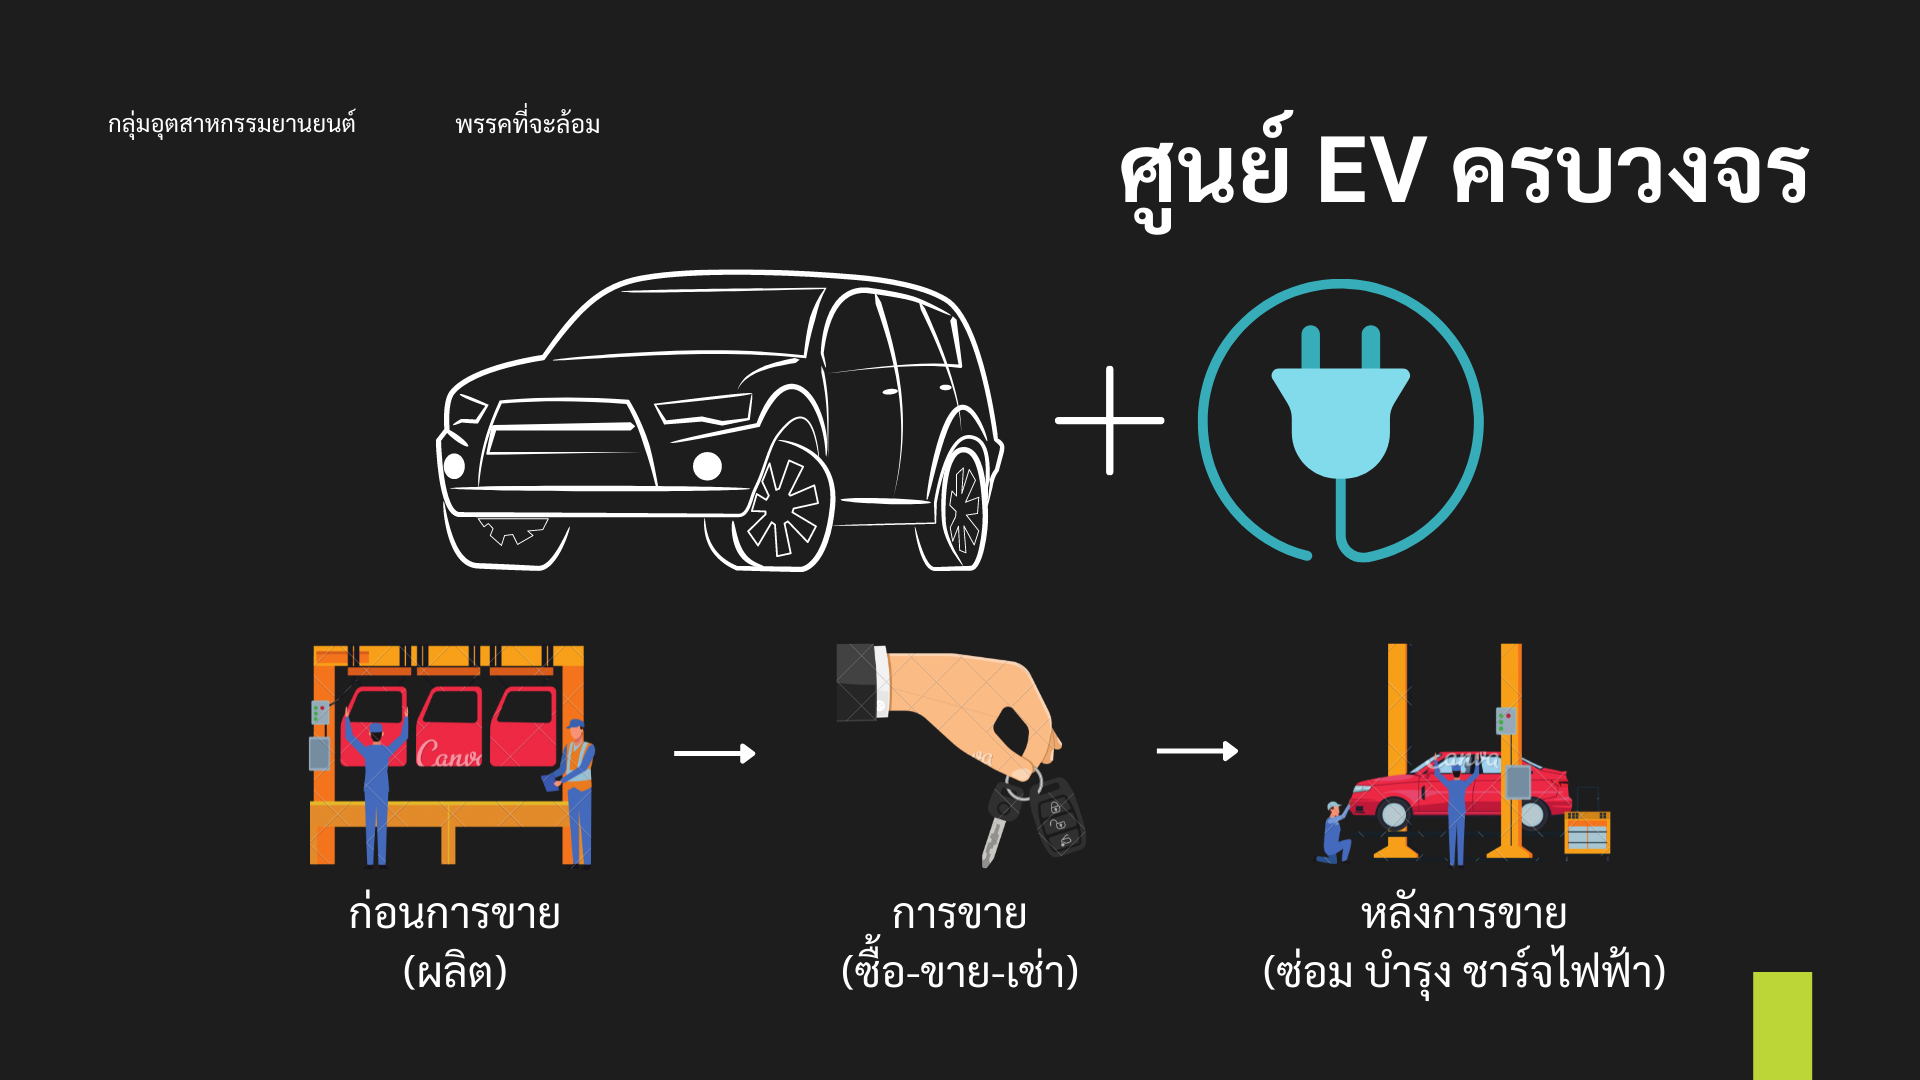

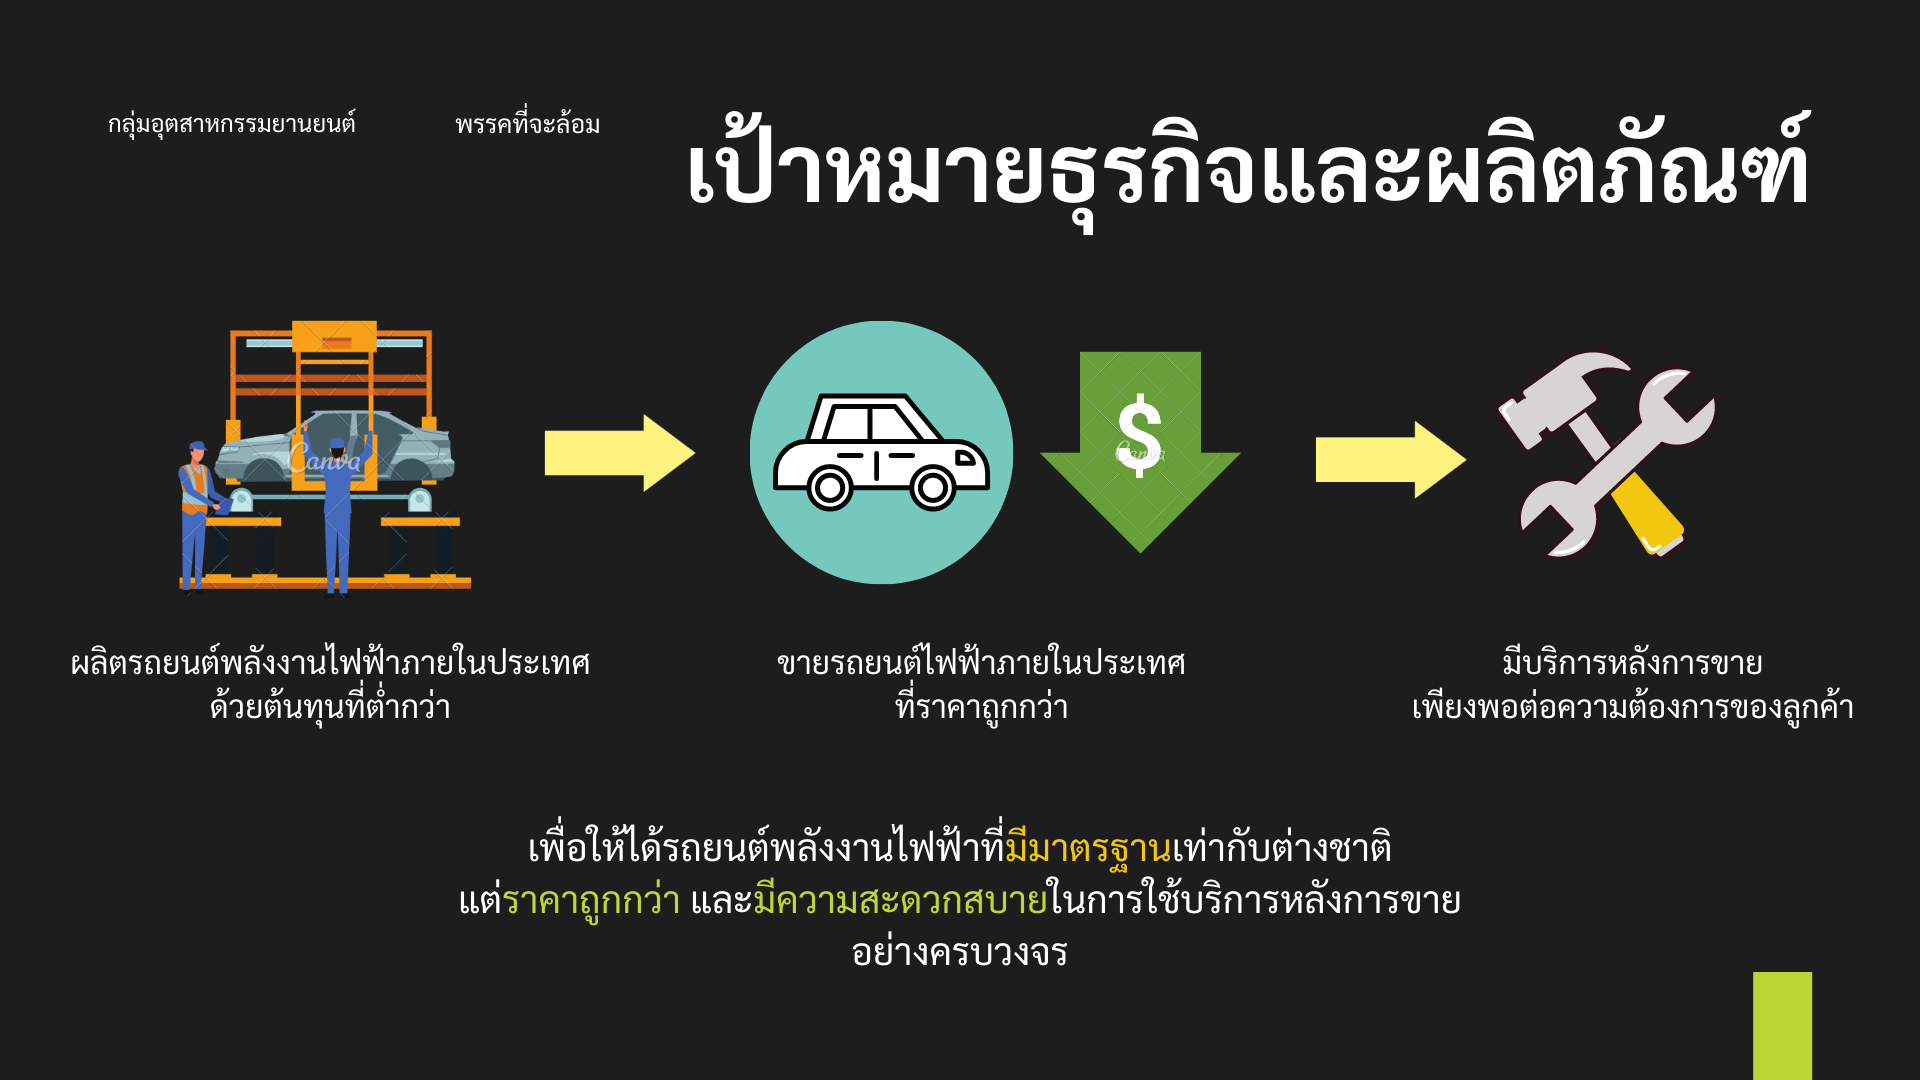

Setup

In [ ]:
!pip install geopandas
!pip install mapclassify

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import geopandas as gpd

%matplotlib inline
from matplotlib.pyplot import figure

import datetime
import io
import PIL

from tqdm import trange, tqdm

def clean_text(a_string): return a_string.replace("\t","")

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)

**ข้อมูลด้านการผลิต**

In [ ]:
#Dataset about production and sale vehicles in Thailand
#https://fti.or.th/automotivestatistics_th/
indusstat = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/Car-Industry-Static.csv')
indusstat

,Year,Total Product,Total Export,Total Sale (InsideCountry)
0,2000,411721,152836,262189
1,2001,459418,175299,297052
2,2002,584951,181471,409362
3,2003,750512,235022,533176
4,2004,928081,332053,625345
5,2005,1125316,440751,703432
6,2006,1188044,538966,682161
7,2007,1287346,690100,631251
8,2008,1394029,776152,615097
9,2009,999378,535563,548871


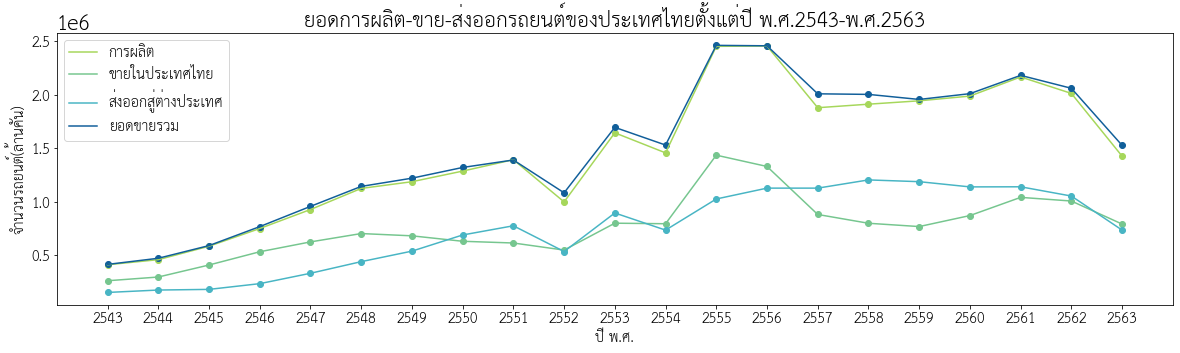

In [ ]:
num_pro = [int(indusstat.loc[x]['Total Product']) for x in indusstat.index]
num_export = [int(indusstat.loc[x]['Total Export']) for x in indusstat.index]
num_insale = [int(indusstat.loc[x]['Total Sale (InsideCountry)']) for x in indusstat.index]
year = ['2543','2544','2545','2546','2547','2548','2549','2550','2551','2552','2553','2554','2555','2556','2557','2558','2559','2560','2561','2562','2563']

plt.subplots(figsize=(20,5))
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

plt.plot(indusstat['Year'],indusstat['Total Product'], color="#a6d75b", label = 'การผลิต')
plt.plot(indusstat['Year'],indusstat['Total Sale (InsideCountry)'], color="#76c68f",label = 'ขายในประเทศไทย')
plt.plot(indusstat['Year'],indusstat['Total Export'], color="#48b5c4", label = 'ส่งออกสู่ต่างประเทศ')
plt.plot(indusstat['Year'],indusstat['Total Sale (InsideCountry)']+indusstat['Total Export'], color="#115f9a", label = 'ยอดขายรวม')
plt.scatter(indusstat['Year'],indusstat['Total Product'], color="#a6d75b")
plt.scatter(indusstat['Year'],indusstat['Total Sale (InsideCountry)'], color="#76c68f")
plt.scatter(indusstat['Year'],indusstat['Total Export'], color="#48b5c4")

plt.scatter(indusstat['Year'],indusstat['Total Sale (InsideCountry)']+indusstat['Total Export'], color="#115f9a")
plt.title("ยอดการผลิต-ขาย-ส่งออกรถยนต์ของประเทศไทยตั้งแต่ปี พ.ศ.2543-พ.ศ.2563", fontsize=20)
plt.xticks(indusstat['Year'],year, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("ปี พ.ศ.", fontsize=14)
plt.ylabel("จำนวนรถยนต์(ล้านคัน)",fontsize=14)
plt.legend(fontsize=14)
plt.show()

กราฟเส้นแสดงข้อมูลยอดการผลิตรถยนต์ภายในประเทศไทย การขายรถยนต์ภายในประเทศรวมถึงรถยนต์ที่ผลิตภายในประเทศและถูกส่งออกไปสู่ต่างประเทศ ตั้งแต่ปี พ.ศ.2543-พ.ศ.2563 เพื่อนำมาเปรียบเทียบยอดขายทั้งหมดกับยอดการผลิตในประเทศไทย ซึ่งจากกราฟเส้นนี้จะเห็นได้ว่าในช่วง 5-6 ปีหลังนั้นการผลิตนั้นไม่เพียงพอต่อความต้องการทั้งหมด

In [ ]:
#Dataset about EV component cost
#https://www.n-squared.co.th/post/ev-components
cost = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/EV-parts-cost.csv')
cost

,Component,2017 electric,2025 electric
0,Battery pack,11500,8000
1,Thermal management,250,225
2,Power distribution module,250,295
3,Inverter/converter,697,523
4,Electric drive module,1200,1080
5,DC converter,150,134
6,Controller,51,46
7,Control module,93,84
8,High voltage cables,335,302
9,On-board charger,273,205


In [ ]:
cost1 = cost.drop(labels=[1,2,3,4,6,7,8,9,10],axis=0)
controllerSys = {'Component':'Controller System', '2017 electric':'998', '2025 electric':'794'}
chargingSys = {'Component':'Charging System', '2017 electric':'758', '2025 electric':'642'}
allModule = {'Component':'Module', '2017 electric':'1543', '2025 electric':'1459'}
cost1 = cost1.append(controllerSys, ignore_index = True)
cost1 = cost1.append(chargingSys, ignore_index = True)
cost1 = cost1.append(allModule, ignore_index = True)
cost1

,Component,2017 electric,2025 electric
0,Battery pack,11500,8000
1,DC converter,150,134
2,Controller System,998,794
3,Charging System,758,642
4,Module,1543,1459


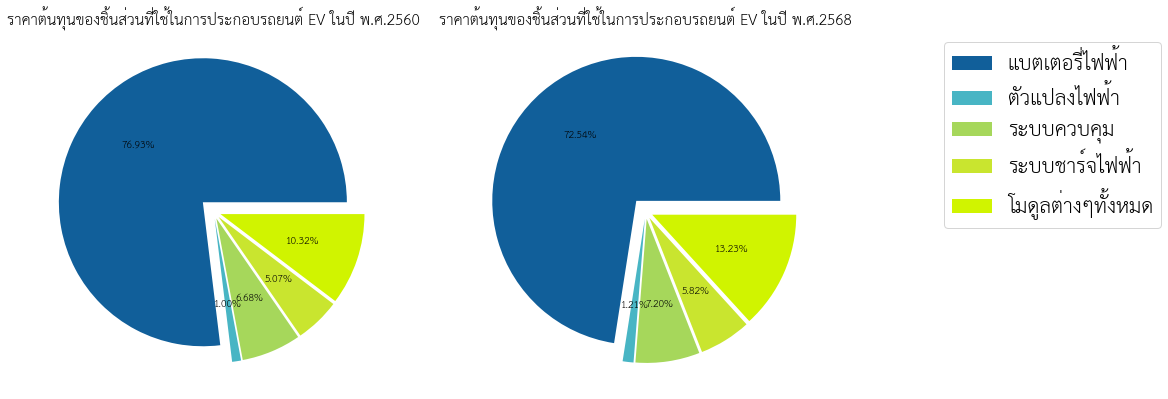

In [ ]:
comp = ['แบตเตอรี่ไฟฟ้า','ตัวแปลงไฟฟ้า','ระบบควบคุม','ระบบชาร์จไฟฟ้า','โมดูลต่างๆทั้งหมด']
color = ["#115f9a","#48b5c4","#a6d75b","#c9e52f","#d0f400"]
ee = (0.1,0.05,0.05,0.05,0.05)

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(cost1['2017 electric'], autopct="%.2f%%", explode=ee, colors=color, textprops={'fontsize': 10})
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(cost1['2025 electric'], autopct="%.2f%%", explode=ee, colors=color, textprops={'fontsize': 10})
ax1.set_title("ราคาต้นทุนของชิ้นส่วนที่ใช้ในการประกอบรถยนต์ EV ในปี พ.ศ.2560", fontsize=15)
ax2.set_title("ราคาต้นทุนของชิ้นส่วนที่ใช้ในการประกอบรถยนต์ EV ในปี พ.ศ.2568", fontsize=15)
plt.legend(comp,bbox_to_anchor=(1.3,1.0))
plt.show()

Pie chartนี้แสดงถึงราคาต้นทุนของชิ้นส่วนที่ใช้ในการประกอบรถยนต์ EV ในปี พ.ศ.2560 ส่วนอีก Pie chart หนึ่งจะแสดงถึงการคาดการณ์ราคาต้นทุนในปี พ.ศ.2568 ด้วยเพื่อนำมาเปรียบเทียบอัตราส่วน และราคาของชิ้นส่วนต่างๆ โดยจะให้ความสำคัญกับราคาของแบตเตอรี่เป็นหลัก ที่เป็นหัวใจสำคัญของรถยนต์ EV ซึ่งจะเห็นได้ว่าในปี พ.ศ.2568 นั้นราคาต้นทุนของแบตเตอรี่นั้นมีราคาถูกลงกว่าแบตเตอรี่ในปี พ.ศ. 2560 อยู่ถึงประมาณ 4% ซึ่งหากคิดเป็นตัวเลขนั้น ถือว่าเป็นราคาที่ลดลงมามากถึง 3500 ดอลลาร์สหรัฐ

**ข้อมูลในด้านการขาย**

In [ ]:
# Data referenced from THE FUTURE OF ELECTRIC VEHICLES IN SOUTH EAST ASIA THAILAND
# https://www-asia.nissan-cdn.net/content/dam/Nissan/th/news/purchasedecisionresearch/Nissan_whitepaper_TH.pdf
data1 = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/data_intention_factor_impact.csv')
data1

,Gender,Q1: Intention to buy EV as next car,Q2 : (Factor) Safety standard,Q3 : (Factor) Can charge at work,Q4 : (Factor) Can charge at home,Q5 : (Factor) Government incentives,Q6 : (Factor) Option to fast charge,Q7 : Impact of fuel source
0,Male,Certainly,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Very Important,Using fuel source for making decision and it m...
1,Male,Certainly,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
2,Male,Certainly,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
3,Male,Certainly,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
4,Male,Certainly,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
...,...,...,...,...,...,...,...,...
289,Female,Certainly,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
290,Female,Certainly,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
291,Female,Certainly,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...
292,Female,Certainly,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Using fuel source for making decision and it m...


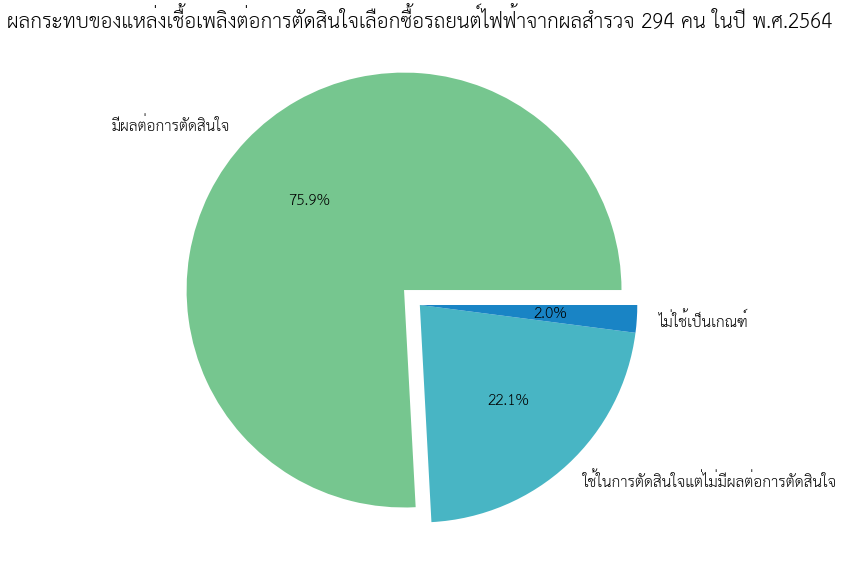

In [ ]:
# Impact of fuel source which related to #LetEarthBreath to EV purchase decision
Impact = ['มีผลต่อการตัดสินใจ','ใช้ในการตัดสินใจแต่ไม่มีผลต่อการตัดสินใจ','ไม่ใช้เป็นเกณฑ์']
impact = []
impact.append(len(data1[data1['Q7 : Impact of fuel source'] == 'Using fuel source for making decision and it makes impact for purchase decision']))
impact.append(len(data1[data1['Q7 : Impact of fuel source'] == 'Using fuel source for making decision but it didn\'t makes impact for purchase decision']))
impact.append(len(data1[data1['Q7 : Impact of fuel source'] == 'Not using fuel source for making decision']))
ee = (0.1,0,0)
plt.figure(figsize=(12,10))
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.pie(impact, labels = Impact,explode = ee,autopct="%.1f%%",colors=['#76c68f', '#48b5c4', '#1984c5'],textprops={'fontsize': 15})
plt.title("ผลกระทบของแหล่งเชื้อเพลิงต่อการตัดสินใจเลือกซื้อรถยนต์ไฟฟ้าจากผลสำรวจ 294 คน ในปี พ.ศ.2564", fontsize=20)
plt.show()

Pie chart นี้แสดงถึงข้อมูลผลกระทบจากการเลือกใช้พลังงานเชื้อเพลิงไฟฟ้าต่อการตัดสินใจเลือกซื้อรถยนต์ไฟฟ้า จากแบบสอบถามในกลุ่มเป้าหมาย 294 คน ในปี 2564

สรุปได้ว่าการเลือกใช้พลังงานไฟฟ้าเป็นพลังงานเชื้อเพลิงมีผลต่อการตัดสินใจเลือกซื้อรถยนต์ไฟฟ้ามากถึง 76 เปอร์เซ็นต์ ดังนั้นหากน้ำแหล่งเชื้อเพลิงมาใช้ในการประชาสัมพันธ์จะส่งผลให้ผู้คนมีความสนใจที่จะเลือกซื้อรถยนต์พลังงานไฟฟ้ามากขึ้น

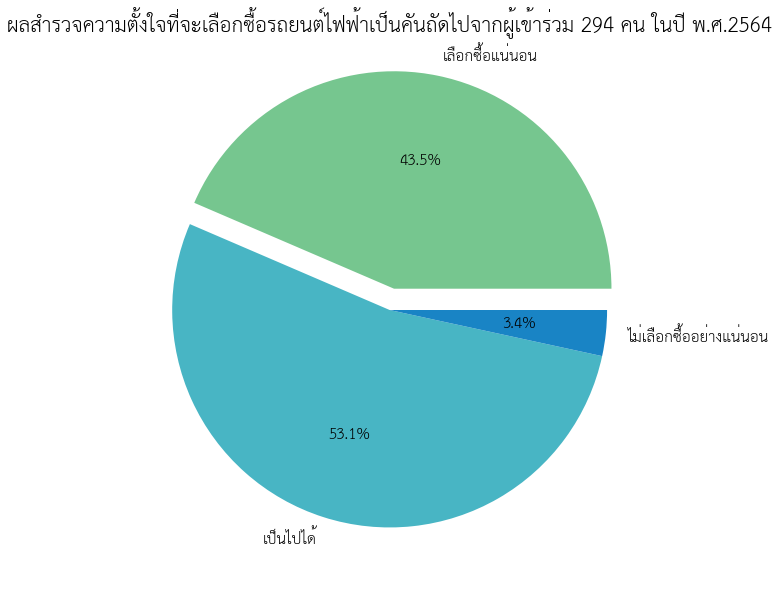

In [ ]:
# Get the information of the intention to purchase EV as the next perchase and plot pie chart
intention = ['เลือกซื้อแน่นอน','เป็นไปได้','ไม่เลือกซื้ออย่างแน่นอน']
overallIntent = []
overallIntent.append(len(data1[data1['Q1: Intention to buy EV as next car'] == 'Certainly']))
overallIntent.append(len(data1[data1['Q1: Intention to buy EV as next car'] == 'Probably']))
overallIntent.append(len(data1[data1['Q1: Intention to buy EV as next car'] == 'Not at all']))
ee = (0.1,0,0)
plt.figure(figsize=(12,10))
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.pie(overallIntent, labels = intention,explode = ee,autopct="%.1f%%",colors=['#76c68f', '#48b5c4', '#1984c5'],textprops={'fontsize': 15})
plt.title("ผลสำรวจความตั้งใจที่จะเลือกซื้อรถยนต์ไฟฟ้าเป็นคันถัดไปจากผู้เข้าร่วม 294 คน ในปี พ.ศ.2564", fontsize=20)
plt.show()

Pie chart นี้แสดงถึงข้อมูลความตั้งใจในการเลือกซื้อรถยนต์ไฟฟ้า จากแบบสอบถามในกลุ่มเป้าหมาย 294 คน ในปี 2564

สรุปได้ว่ามีผู้ที่จะซื้อรถยนต์ไฟฟ้าอย่างแน่นอนมากถึง 44 เปอร์เซ็นต์ และมีแนวโน้มที่จะซื้ออีก 53 เปอร์เซ็นต์ แสดงให้เห็นถึงแนวโน้มที่ผู้คนจะเลือกซื้อรถยนต์ไฟฟ้าในอนาคตมากขึ้นตามความสนใจ

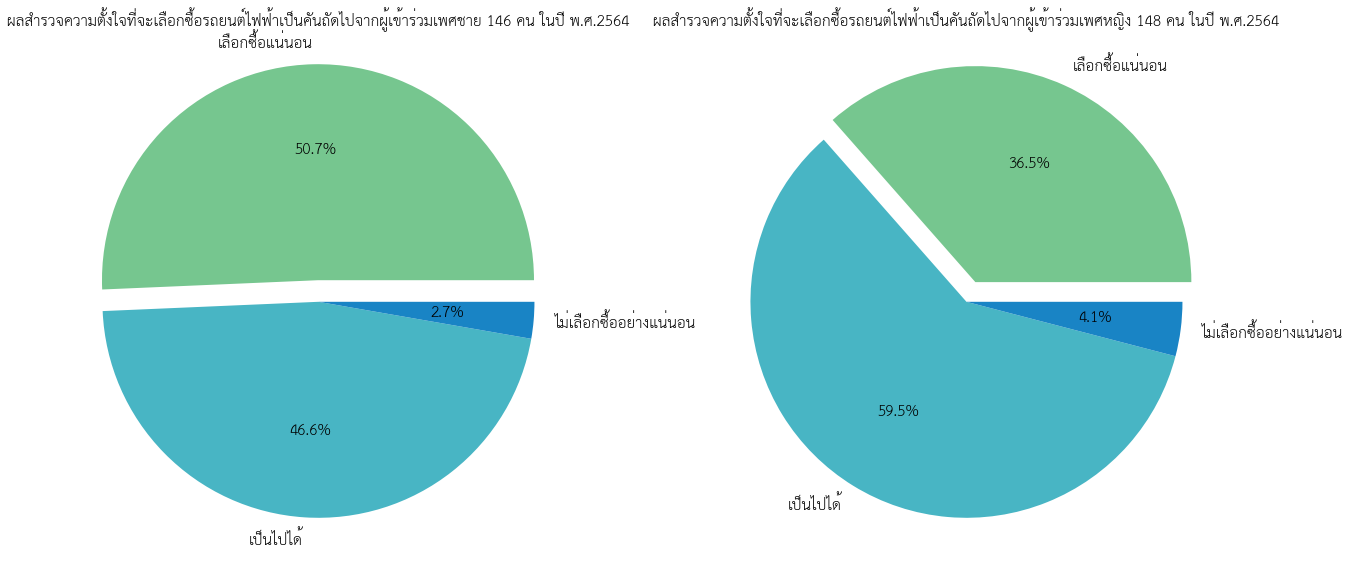

In [ ]:
# Select only male participant
maleIntent = []
dfMale = data1[data1['Gender'] == 'Male']
maleIntent.append(len(dfMale[dfMale['Q1: Intention to buy EV as next car'] == 'Certainly']))
maleIntent.append(len(dfMale[dfMale['Q1: Intention to buy EV as next car'] == 'Probably']))
maleIntent.append(len(dfMale[dfMale['Q1: Intention to buy EV as next car'] == 'Not at all']))
# Select only female participant
femaleIntent = []
dfFemale = data1[data1['Gender'] == 'Female']
femaleIntent.append(len(dfFemale[dfFemale['Q1: Intention to buy EV as next car'] == 'Certainly']))
femaleIntent.append(len(dfFemale[dfFemale['Q1: Intention to buy EV as next car'] == 'Probably']))
femaleIntent.append(len(dfFemale[dfFemale['Q1: Intention to buy EV as next car'] == 'Not at all']))

# Plot pie chart compare between male and female
fig = plt.figure(figsize=(18,15))
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(maleIntent, labels = intention,explode = ee,autopct="%.1f%%",colors=['#76c68f', '#48b5c4', '#1984c5'],textprops={'fontsize': 15})
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(femaleIntent, labels = intention,explode = ee,autopct="%.1f%%",colors=['#76c68f', '#48b5c4', '#1984c5'],textprops={'fontsize': 15})
ax1.set_title('ผลสำรวจความตั้งใจที่จะเลือกซื้อรถยนต์ไฟฟ้าเป็นคันถัดไปจากผู้เข้าร่วมเพศชาย 146 คน ในปี พ.ศ.2564', fontsize=15)
ax2.set_title('ผลสำรวจความตั้งใจที่จะเลือกซื้อรถยนต์ไฟฟ้าเป็นคันถัดไปจากผู้เข้าร่วมเพศหญิง 148 คน ในปี พ.ศ.2564', fontsize=15)
plt.show()

Pie chart 2 chart นี้แสดงถึง ข้อมูลความตั้งใจในการเลือกซื้อรถยนต์ไฟฟ้า จากแบบสอบถามในกลุ่มเป้าหมายแยกตามเพศโดย เพศชาย 146 คน และ เพศหญิง 148 คน ในปี 2564

สรุปได้ว่าผู้ชายมีแนวโน้มที่จะซื้อมากกว่าผู้หญิง ดังนั้นจะต้องนำเสนอการขายที่แตกต่างกันเช่น

ผู้ชาย เน้นการขายที่ประสิทธิภาพ และ ผู้หญิง เน้นเพิ่มความเชื่อมั่นในการใช้รถยนต์ไฟฟ้าเพิ่มเติม

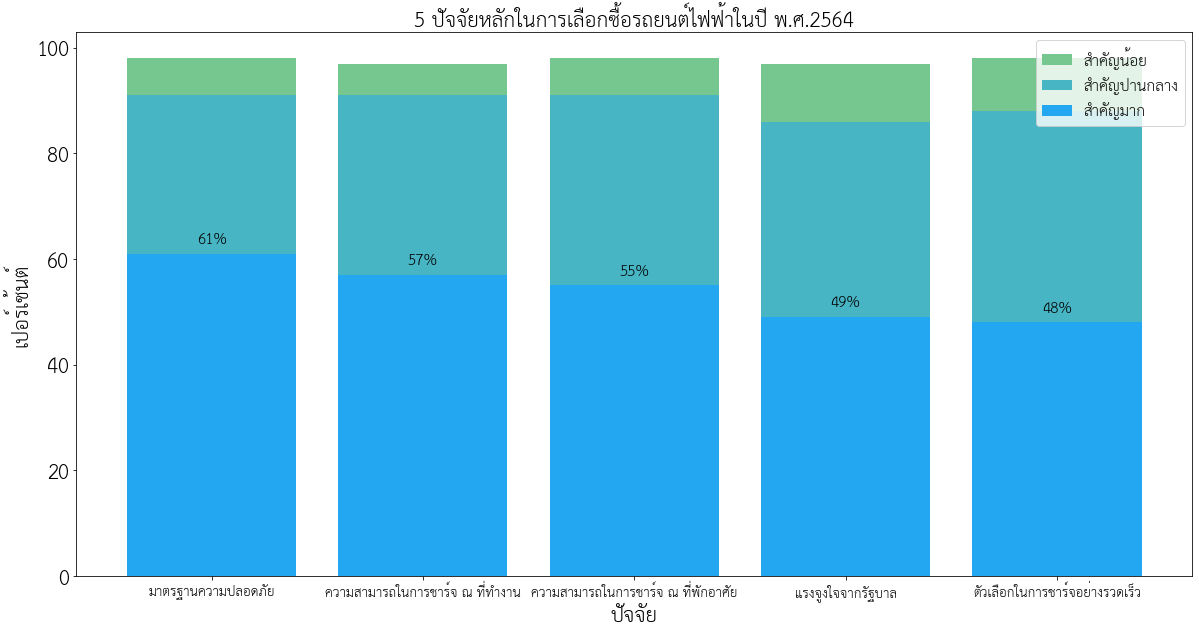

In [ ]:
allrow = len(data1)
VeryIm = []
VeryIm.append(int(float("{:.2f}".format(len(data1[data1['Q2 : (Factor) Safety standard'] == 'Very Important'])/allrow))*100))
VeryIm.append(int(float("{:.2f}".format(len(data1[data1['Q3 : (Factor) Can charge at work'] == 'Very Important'])/allrow))*100))
VeryIm.append(int(float("{:.2f}".format(len(data1[data1['Q4 : (Factor) Can charge at home'] == 'Very Important'])/allrow))*100))
VeryIm.append(int(float("{:.2f}".format(len(data1[data1['Q5 : (Factor) Government incentives'] == 'Very Important'])/allrow))*100))
VeryIm.append(int(float("{:.2f}".format(len(data1[data1['Q6 : (Factor) Option to fast charge'] == 'Very Important'])/allrow))*100))
SomeIm = []
SomeIm.append(int(float("{:.2f}".format(len(data1[data1['Q2 : (Factor) Safety standard'] == 'Somewhat Important'])/allrow))*100))
SomeIm.append(int(float("{:.2f}".format(len(data1[data1['Q3 : (Factor) Can charge at work'] == 'Somewhat Important'])/allrow))*100))
SomeIm.append(int(float("{:.2f}".format(len(data1[data1['Q4 : (Factor) Can charge at home'] == 'Somewhat Important'])/allrow))*100))
SomeIm.append(int(float("{:.2f}".format(len(data1[data1['Q5 : (Factor) Government incentives'] == 'Somewhat Important'])/allrow))*100))
SomeIm.append(int(float("{:.2f}".format(len(data1[data1['Q6 : (Factor) Option to fast charge'] == 'Somewhat Important'])/allrow))*100))
SlightIm = []
SlightIm.append(int(float("{:.2f}".format(len(data1[data1['Q2 : (Factor) Safety standard'] == 'Slightly Important'])/allrow))*100))
SlightIm.append(int(float("{:.2f}".format(len(data1[data1['Q3 : (Factor) Can charge at work'] == 'Slightly Important'])/allrow))*100))
SlightIm.append(int(float("{:.2f}".format(len(data1[data1['Q4 : (Factor) Can charge at home'] == 'Slightly Important'])/allrow))*100))
SlightIm.append(int(float("{:.2f}".format(len(data1[data1['Q5 : (Factor) Government incentives'] == 'Slightly Important'])/allrow))*100))
SlightIm.append(int(float("{:.2f}".format(len(data1[data1['Q6 : (Factor) Option to fast charge'] == 'Slightly Important'])/allrow))*100))
All = []
for i in range(len(VeryIm)):
  All.append(VeryIm[i]+SomeIm[i]+SlightIm[i])
factort = ["มาตรฐานความปลอดภัย","ความสามารถในการชาร์จ ณ ที่ทำงาน","ความสามารถในการชาร์จ ณ ที่พักอาศัย","แรงจูงใจจากรัฐบาล","ตัวเลือกในการชาร์จอย่างรวดเร็ว"]

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.subplots(figsize=(20,10))
plt.bar(factort,All ,color="#76c68f" , label = 'สำคัญน้อย')
plt.bar(factort,SomeIm ,color="#48b5c4" ,label = "สำคัญปานกลาง" ,bottom=VeryIm)
plt.bar(factort,VeryIm ,color="#22a7f0" , label = 'สำคัญมาก')
for i in range(len(factort)):
  plt.text(i,VeryIm[i]+2,str(VeryIm[i])+"%",ha='center',color = "black", fontsize=15)
plt.title("5 ปัจจัยหลักในการเลือกซื้อรถยนต์ไฟฟ้าในปี พ.ศ.2564", fontsize=20)
plt.xlabel("ปัจจัย")
plt.ylabel('เปอร์เซ้นต์')
plt.xticks(factort, factort, fontsize=13)

plt.legend(fontsize=15)
plt.show()

Bar chart นี้ข้อมูลปัจจัยที่ส่งเสริมให้ตัดสินใจซื้อรถยนต์ไฟฟ้า จากแบบสอบถามในกลุ่มเป้าหมาย 294 คน

สรุปได้ว่าผู้ทำแบบสอบถามใช้ปัจจัยด้านความปลอดภัย ความสามารถในการชาร์จจากที่ทำงานและชาร์จจากที่พักอาศัยเป็น 3 ปัจจัยแรก เราจึงนำส่วนนี้มาเป็นปัจจัยหลักในการทำงานของเรา

In [ ]:
# Information about new car of xEV between 2017 - 2021
# https://web.dlt.go.th/statistics/ 
newxEV = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/NewCar2017_2021.csv')
newxEV

,Year,BEV,HEV,PHEV
0,2017,164,11945,0
1,2018,284,20167,0
2,2019,1539,30625,0
3,2020,2997,31142,1089
4,2021,5768,35702,7057


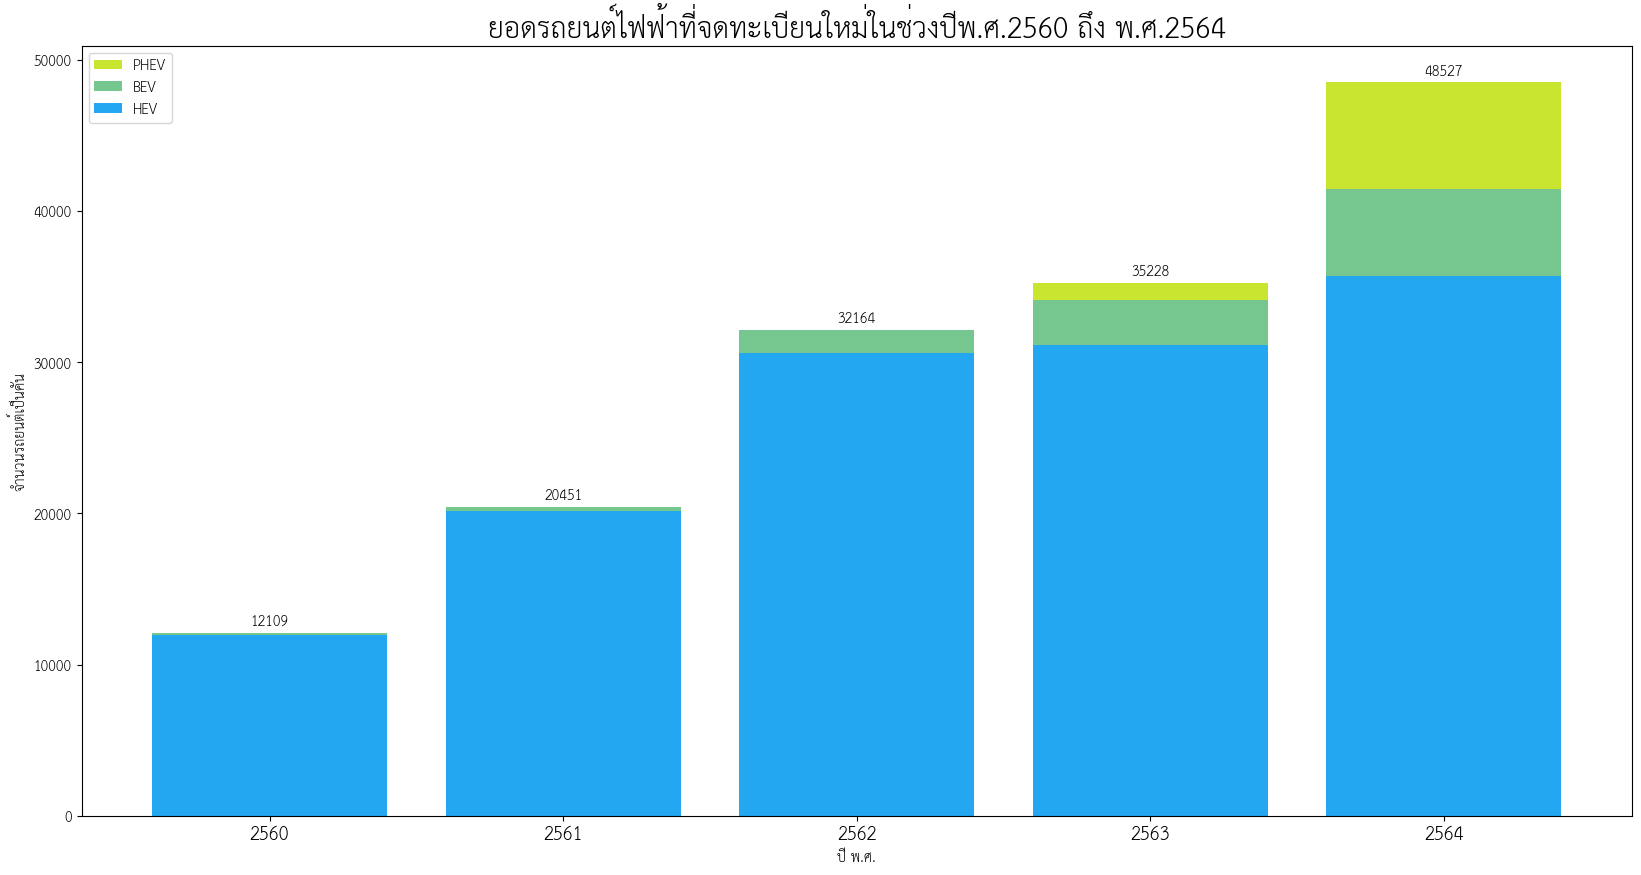

In [ ]:
year = ['2560','2561','2562','2563','2564']
BEV_num = [int(newxEV.loc[x]['BEV']) for x in newxEV.index ]
HEV_num = [int(newxEV.loc[x]['HEV']) for x in newxEV.index ]
PHEV_num = [int(newxEV.loc[x]['PHEV']) for x in newxEV.index ]
acc_num = [int(newxEV.loc[x]['PHEV']+newxEV.loc[x]['HEV']+newxEV.loc[x]['BEV']) for x in newxEV.index ]
plt.style.use('default')

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.subplots(figsize=(20,10))
plt.bar(newxEV['Year'],newxEV['PHEV'] +newxEV['BEV']+newxEV['HEV'],color="#c9e52f" , label = 'PHEV')
plt.bar(newxEV['Year'],newxEV['BEV'] ,color="#76c68f" ,label = "BEV" ,bottom=newxEV['HEV'])
plt.bar(newxEV['Year'],newxEV['HEV'] ,color="#22a7f0" , label = 'HEV')
for i in range(len(year)):
  plt.text(newxEV['Year'][i],BEV_num[i]+HEV_num[i]+PHEV_num[i]+500,acc_num[i],ha='center',color = "black")

plt.title("ยอดรถยนต์ไฟฟ้าที่จดทะเบียนใหม่ในช่วงปีพ.ศ.2560 ถึง พ.ศ.2564", fontsize=20)
plt.xlabel("ปี พ.ศ.")
plt.ylabel('จำนวนรถยนต์เป็นคัน')
plt.xticks(newxEV['Year'], year, fontsize=13)

plt.legend()
plt.show()

Bar chart นี้แสดงให้เห็นถึงยอดรถยนต์ไฟฟ้าที่จดทะเบียนใหม่ในช่วงปี พ.ศ.2560 ถึง พ.ศ.2564 ที่มียอดเพิ่มขึ้นเรื่อยๆ และเติบโตอย่างก้าวกระโดดถึง 37.75% ในปี พ.ศ.2564 เพียงปีเดียว แสดงให้เห็นถึงความนิยมที่มีต่อรถยนต์ไฟฟ้า

In [ ]:
# Information about accumulated number of xEV between 2017 - 2021
# https://web.dlt.go.th/statistics/ 
xEV = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/AccumulatedNumberOfxEV2017-2021.csv')
xEV

,Year,BEV,HEV,PHEV
0,2017,1330,91044,0
1,2018,1369,111202,0
2,2019,2737,141725,0
3,2020,5565,150615,24190
4,2021,11144,185047,31141


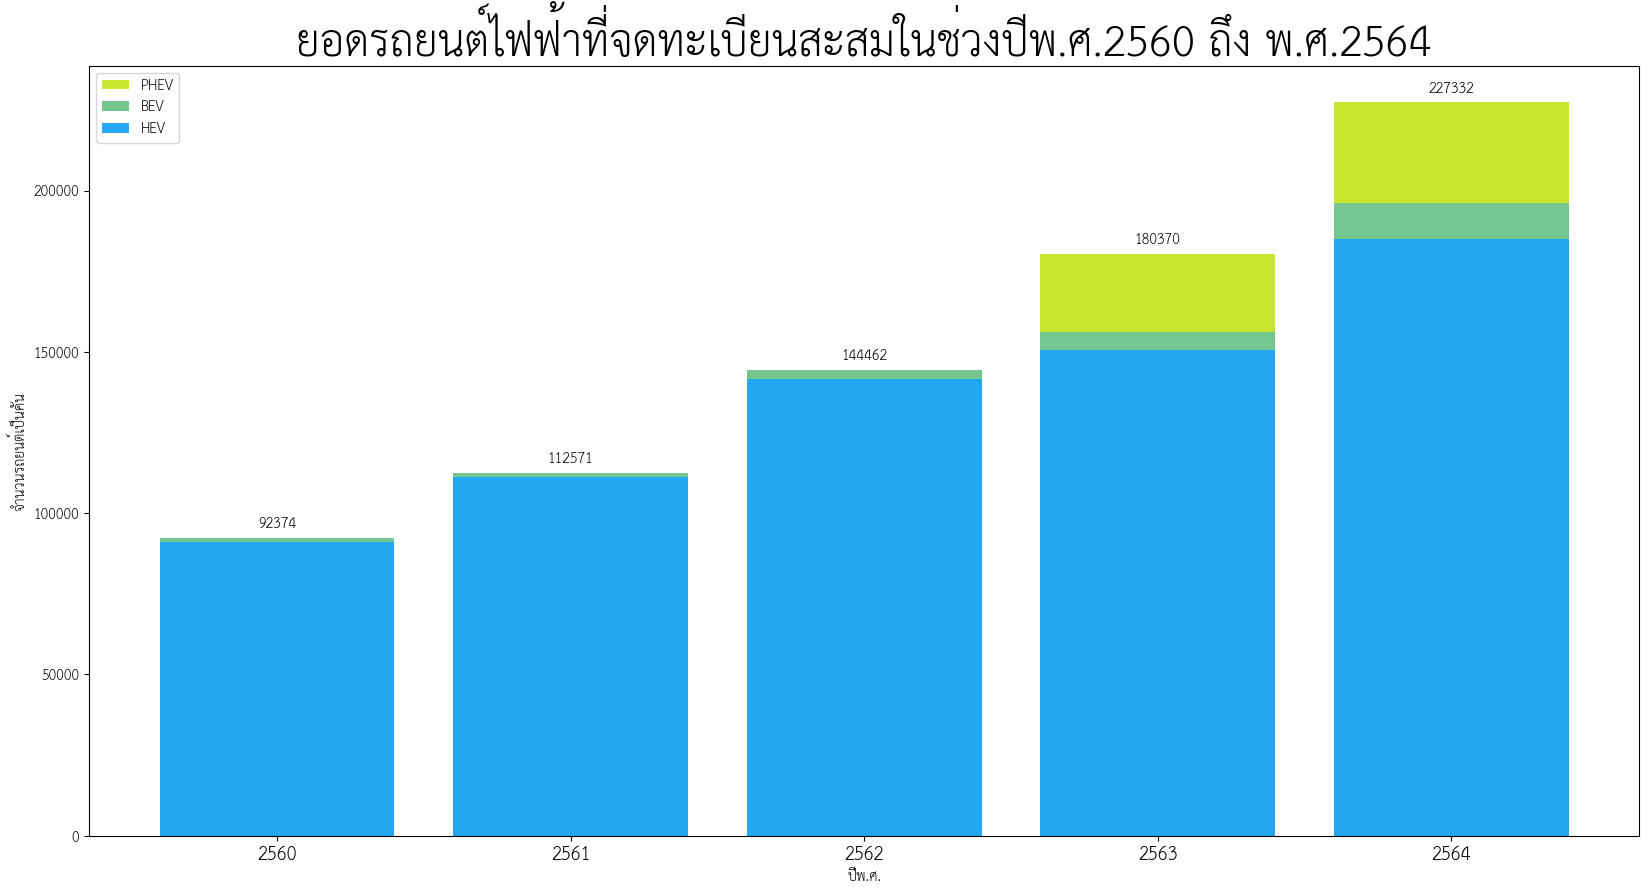

In [ ]:
year = ['2560','2561','2562','2563','2564']
BEV_num = [int(xEV.loc[x]['BEV']) for x in xEV.index ]
HEV_num = [int(xEV.loc[x]['HEV']) for x in xEV.index ]
PHEV_num = [int(xEV.loc[x]['PHEV']) for x in xEV.index ]
acc_num = [int(xEV.loc[x]['PHEV']+xEV.loc[x]['HEV']+xEV.loc[x]['BEV']) for x in xEV.index ]
plt.style.use('default')

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.subplots(figsize=(20,10))
plt.bar(xEV['Year'],xEV['PHEV'] +xEV['BEV']+xEV['HEV'],color="#c9e52f" , label = 'PHEV')
plt.bar(xEV['Year'],xEV['BEV'] ,color="#76c68f" ,label = "BEV" ,bottom=xEV['HEV'])
plt.bar(xEV['Year'],xEV['HEV'] ,color="#22a7f0" , label = 'HEV')
for i in range(len(year)):
  plt.text(xEV['Year'][i],BEV_num[i]+HEV_num[i]+PHEV_num[i]+3000,acc_num[i],ha='center',color = "black")

plt.title("ยอดรถยนต์ไฟฟ้าที่จดทะเบียนสะสมในช่วงปีพ.ศ.2560 ถึง พ.ศ.2564", fontsize=30)
plt.xlabel("ปีพ.ศ.")
plt.ylabel('จำนวนรถยนต์เป็นคัน')
plt.xticks(newxEV['Year'], year, fontsize=13)

plt.legend()
plt.show()

Bar chart นี้แสดงให้เห็นถึงยอดรถยนต์ไฟฟ้าที่จดทะเบียนสะสมในช่วงปีพ.ศ.2560 ถึง พ.ศ.2564 ที่มียอดเพิ่มขึ้นในทุก ๆ ปี และยังคงมีแนวโน้มที่จะเพิ่มมากขึ้นอีกเรื่อย ๆ

สำหรับการทำแผนที่ประเทศไทย จะต้อง install library geopandas และ mapclassify ก่อนเป็นอันดับแรก

In [ ]:
!pip install geopandas
!pip install mapclassify

ในส่วนนี้คือการดึงข้อมูลไฟล์แผนที่ประเทศไทยมาจาก Github ของสมาชิกในกลุ่ม

In [ ]:
# For using shape file
!git clone https://github.com/plaipmc/CS246_EV_Vehicle.git

fatal: destination path 'CS246_EV_Vehicle' already exists and is not an empty directory.


ดึงข้อมูลแผนที่ประเทศไทย (ไฟล์ .shp -> tha_map) และ ข้อมูลชื่อจังหวัด (province_name) แล้วนำมารวบรวมให้เป็นข้อมูลที่มีรูปร่างของแผนที่พร้อมชื่อจังหวัด

In [ ]:
tha_map = gpd.read_file('/content/CS246_EV_Vehicle/data/THA_MAP.shp')
province_name = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/Province_NAME.csv',index_col = None); del province_name["Index"]
province_name["NAME"] = province_name["NAME"].apply(clean_text)

tha_map["NAME"] = province_name["NAME"] 
tha_map["Province"] = province_name["Province"] 
tha_map = tha_map.sort_values(by="NAME")

In [ ]:
tha_map.head()

,geometry,NAME,Province
17,"MULTIPOLYGON (((99.11329 7.48927, 99.11337 7.4...",กระบี่,Krabi
2,"POLYGON ((100.61389 13.95462, 100.61428 13.954...",กรุงเทพมหานคร,Bangkok
15,"POLYGON ((98.58631 15.65465, 98.58662 15.65384...",กาญจนบุรี,Kanchanaburi
13,"POLYGON ((103.58404 17.09981, 103.58452 17.099...",กาฬสินธุ์,Kalasin
14,"POLYGON ((99.48875 16.91044, 99.48883 16.91016...",กำแพงเพชร,Kamphaeng Phet


ดึงข้อมูลด้านยอดขายรถยนต์ไฟฟ้าสะสมในแต่ละจังหวัด 

In [ ]:
accumurateEV = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/accumuratedxEVbyProvince.csv')
accumurateEV.head()

,province_of_onset,number_xEV
0,อำนาจเจริญ,33
1,อ่างทอง,34
2,กรุงเทพมหานคร,34526
3,บึงกาฬ,26
4,บุรีรัมย์,147


ทำการ Join ข้อมูล แผนที่กับข้อมูลยอดขายรถยนต์ไฟฟ้าสะสมในแต่ละจังหวัด โดยมีข้อมูลจังหวัดเหมือนกัน

ซึ่งจะได้ข้อมูลรูปร่างของแผนที่ที่มียอดขายรถยนต์ไฟฟ้าในแต่ละจังหวัดพร้อมชื่อจังหวัด

In [ ]:
merge = tha_map.join(accumurateEV,how="right")
merge

,geometry,NAME,Province,province_of_onset,number_xEV
0,"POLYGON ((104.95982 16.28359, 104.95986 16.283...",อำนาจเจริญ,Amnat Charoen,อำนาจเจริญ,33
1,"POLYGON ((100.33319 14.79853, 100.33341 14.798...",อ่างทอง,Ang Thong,อ่างทอง,34
2,"POLYGON ((100.61389 13.95462, 100.61428 13.954...",กรุงเทพมหานคร,Bangkok,กรุงเทพมหานคร,34526
3,"POLYGON ((103.40497 18.44898, 103.40619 18.448...",บึงกาฬ,Bueng Kan,บึงกาฬ,26
4,"POLYGON ((102.93029 15.79514, 102.93029 15.795...",บุรีรัมย์,Buri Ram,บุรีรัมย์,147
...,...,...,...,...,...
72,"POLYGON ((102.05806 18.08620, 102.05835 18.085...",อุดรธานี,Udon Thani,อุดรธานี,385
73,"POLYGON ((99.13905 15.79655, 99.13918 15.79652...",อุทัยธานี,Uthai Thani,อุทัยธานี,71
74,"POLYGON ((101.09241 18.38167, 101.09277 18.381...",อุตรดิตถ์,Uttaradit,อุตรดิตถ์,67
75,"POLYGON ((101.29272 6.68112, 101.29369 6.67953...",ยะลา,Yala,ยะลา,47


นำมา plot แผนที่ประเทศไทย พร้อมแบ่งส่วนสีตามยอดขายสะสม

0

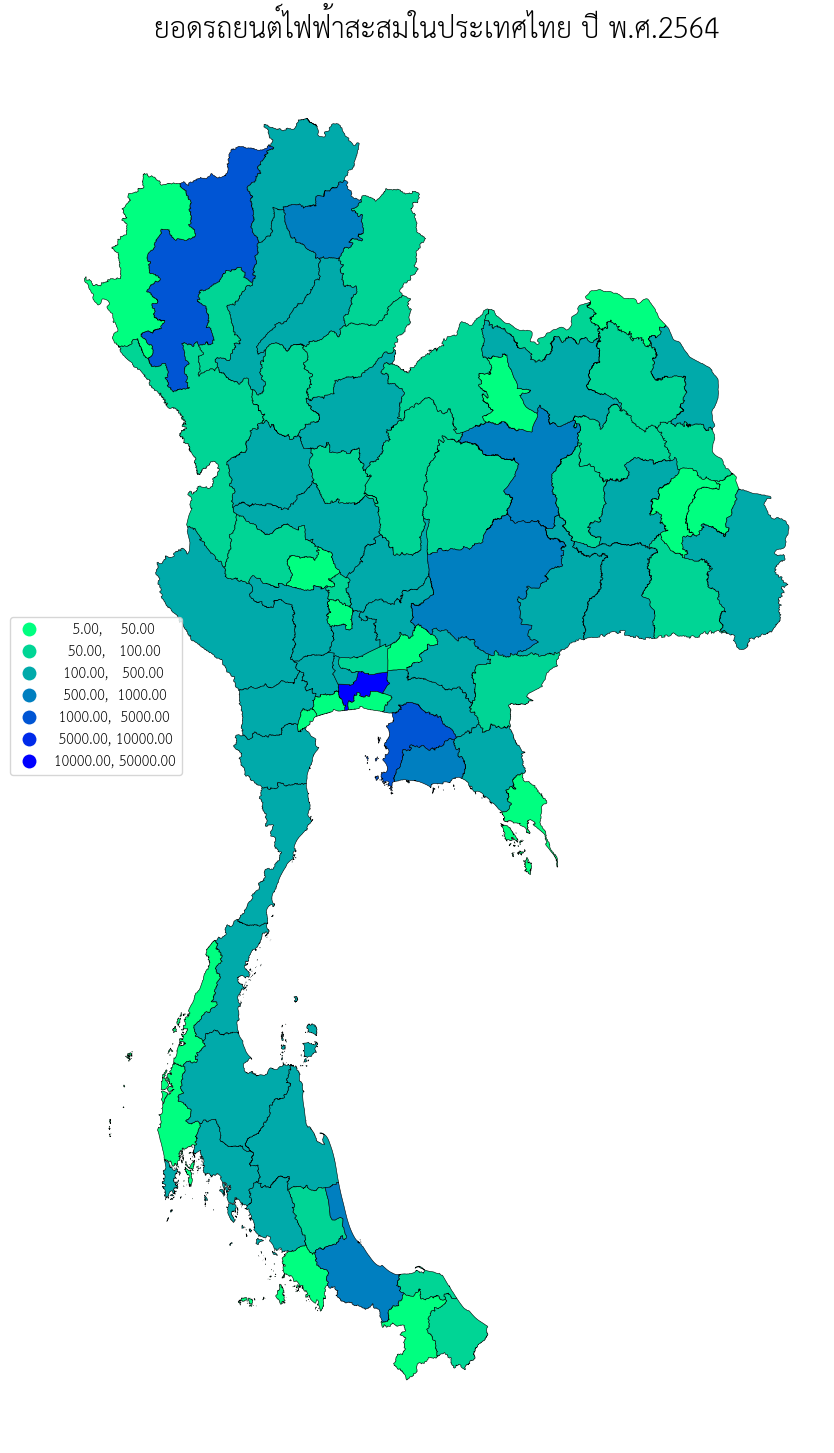

In [ ]:
bins = [50,100,500,1000,5000,10000,50000]
ax = merge.plot(column = merge["number_xEV"], cmap='winter_r',figsize=(10,20),legend = True, scheme = 'user_defined', classification_kwds = {'bins':bins}, edgecolor = 'black',linewidth = 0.4)

ax.set_title('ยอดรถยนต์ไฟฟ้าสะสมในประเทศไทย ปี พ.ศ.2564', fontdict = 
             {'fontsize':20}, pad = 12.5)

# Removing the axes
ax.set_axis_off()

# Move the legend 
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.18, 0.6))

img = ax.get_figure()

f = io.BytesIO()
img.savefig(f, format = 'png', bbox_inches = 'tight')
f.seek(0)

Map นี้แสดงยอดรถยนต์ไฟฟ้าในแต่ละจังหวัดในปีพ.ศ.2564 ซึ่งจะเห็นได้ว่าจังหวัดที่มีจำนวนรถยนต์ไฟฟ้าจำนวนมากที่สุด 3 ลำดับคือ จังหวัดกทม. เชียงรายและชลบุรี 

**ข้อมูลหลังการขาย**

จากที่ทางกลุ่มได้เห็นถึง โอกาสและการครอบคลุมให้ครบทั้งระบบของบริการด้านรถยนต์ไฟฟ้า ทางกลุ่มจึงได้วางแผนถึงการสร้างสถานีเติมประจุไฟฟ้าให้กับรถยนต์ไฟฟ้าด้วย เพราะนอกจากที่จะผลิตแล้ว การมีสถานีเติมพลังงานก็เป็นสิ่งจำเป็นอันดับต้นของ รถยนต์ไฟฟ้าเหมือนกัน

In [ ]:
gas_station = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/gas%20station%20dataset%202014.csv')
gas_station

,Continent,Provide,PTT,Shell,Esso,Chevron,Bangchak,Thai Oil,RPCG,Susco,...,Picnic,WP energy,Unique Gas,Saim Gas,PAP,NS Gas,Takuni,Orchid Gas LPG Station,Thai Gas,Other
0,MD,BKK,155,110,110,53,109,0,4,25,...,34,26,2,79,6,14,14,5,5,110
1,MD,NBI,30,13,20,11,16,0,0,1,...,16,6,5,22,0,0,1,0,0,55
2,MD,SPK,22,20,20,15,25,0,2,2,...,6,7,0,8,1,1,2,0,1,44
3,MD,PTE,31,11,30,9,21,0,1,6,...,21,7,1,16,0,0,1,0,2,91
4,MD,AYA,24,9,11,13,21,0,1,2,...,1,17,1,3,5,0,0,0,0,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,S,SKA,32,17,6,8,13,0,0,5,...,1,23,3,2,0,0,0,0,0,239
73,S,STN,6,1,1,1,2,0,0,2,...,0,0,2,0,0,0,0,0,0,50
74,S,PTN,11,2,0,0,3,0,0,4,...,0,0,1,0,0,0,0,0,0,53
75,S,YLA,8,1,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,45


In [ ]:
gas_station.isnull().sum()
gas_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Continent                    77 non-null     object
 1   Provide                      77 non-null     object
 2   PTT                          77 non-null     int64 
 3   Shell                        77 non-null     int64 
 4   Esso                         77 non-null     int64 
 5   Chevron                      77 non-null     int64 
 6   Bangchak                     77 non-null     int64 
 7   Thai Oil                     77 non-null     int64 
 8   RPCG                         77 non-null     int64 
 9   Susco                        77 non-null     int64 
 10  Susco Dealer                 77 non-null     int64 
 11  PTG                          77 non-null     int64 
 12  IRPC                         77 non-null     int64 
 13  PTT Oil and Retail Business  77 non-n

In [ ]:
gas_station["all_in_provide"] = gas_station["PTT"]+gas_station["Shell"]+gas_station["Esso"]+gas_station["Chevron"]+gas_station["Bangchak"]+gas_station["Thai Oil"]+gas_station["RPCG"]+gas_station["Susco"]+gas_station["Susco Dealer"]+gas_station["PTG"]+gas_station["IRPC"]+gas_station["PTT Oil and Retail Business"]+gas_station["PC"]+gas_station["Saengthong"]+gas_station["Picnic"]+gas_station["WP energy"]+gas_station["Unique Gas"]+gas_station["Saim Gas"]+gas_station["PAP"]+gas_station["NS Gas"]+gas_station["Takuni"]+gas_station["Orchid Gas LPG Station"]+gas_station["Thai Gas"]+gas_station["Other"]
gas_station

,Continent,Provide,PTT,Shell,Esso,Chevron,Bangchak,Thai Oil,RPCG,Susco,...,WP energy,Unique Gas,Saim Gas,PAP,NS Gas,Takuni,Orchid Gas LPG Station,Thai Gas,Other,all_in_provide
0,MD,BKK,155,110,110,53,109,0,4,25,...,26,2,79,6,14,14,5,5,110,942
1,MD,NBI,30,13,20,11,16,0,0,1,...,6,5,22,0,0,1,0,0,55,224
2,MD,SPK,22,20,20,15,25,0,2,2,...,7,0,8,1,1,2,0,1,44,198
3,MD,PTE,31,11,30,9,21,0,1,6,...,7,1,16,0,0,1,0,2,91,272
4,MD,AYA,24,9,11,13,21,0,1,2,...,17,1,3,5,0,0,0,0,209,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,S,SKA,32,17,6,8,13,0,0,5,...,23,3,2,0,0,0,0,0,239,359
73,S,STN,6,1,1,1,2,0,0,2,...,0,2,0,0,0,0,0,0,50,67
74,S,PTN,11,2,0,0,3,0,0,4,...,0,1,0,0,0,0,0,0,53,74
75,S,YLA,8,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,45,61


In [ ]:
each_con = gas_station.groupby(["Continent"]).sum().reset_index()
each_con

,Continent,PTT,Shell,Esso,Chevron,Bangchak,Thai Oil,RPCG,Susco,Susco Dealer,...,WP energy,Unique Gas,Saim Gas,PAP,NS Gas,Takuni,Orchid Gas LPG Station,Thai Gas,Other,all_in_provide
0,E,148,60,42,45,97,2,10,10,4,...,32,4,28,10,6,7,1,7,1105,1733
1,MD,333,178,209,114,257,0,18,39,44,...,68,12,146,19,15,18,5,8,1227,2975
2,N,233,72,87,54,239,0,12,34,8,...,32,38,44,1,0,10,8,0,5062,6135
3,NE,370,74,67,69,312,0,21,28,0,...,28,27,117,8,1,0,4,0,6754,8196
4,S,219,76,51,51,79,0,0,44,0,...,27,20,34,0,0,0,0,0,1747,2426
5,W,179,38,60,26,78,0,6,4,4,...,25,16,24,7,1,6,1,1,1355,2013


In [ ]:
en_station = pd.read_csv('https://raw.githubusercontent.com/plaipmc/CS246_EV_Vehicle/main/data/en%20con%20data.csv')
en_station['all_in_provide']  = en_station['PTT'] +en_station['MEA'] +en_station['PEA'] +en_station['EGAT'] 
en_real = [29,528,106,89,104,16]
en_station['en_real'] = en_real
en_station

,Continent,PTT,MEA,PEA,EGAT,all_in_provide,en_real
0,E,6,0,20,3,29,29
1,MD,42,19,6,2,69,528
2,N,15,0,16,4,35,106
3,NE,10,0,16,4,30,89
4,S,10,0,17,3,30,104
5,W,12,0,2,2,16,16


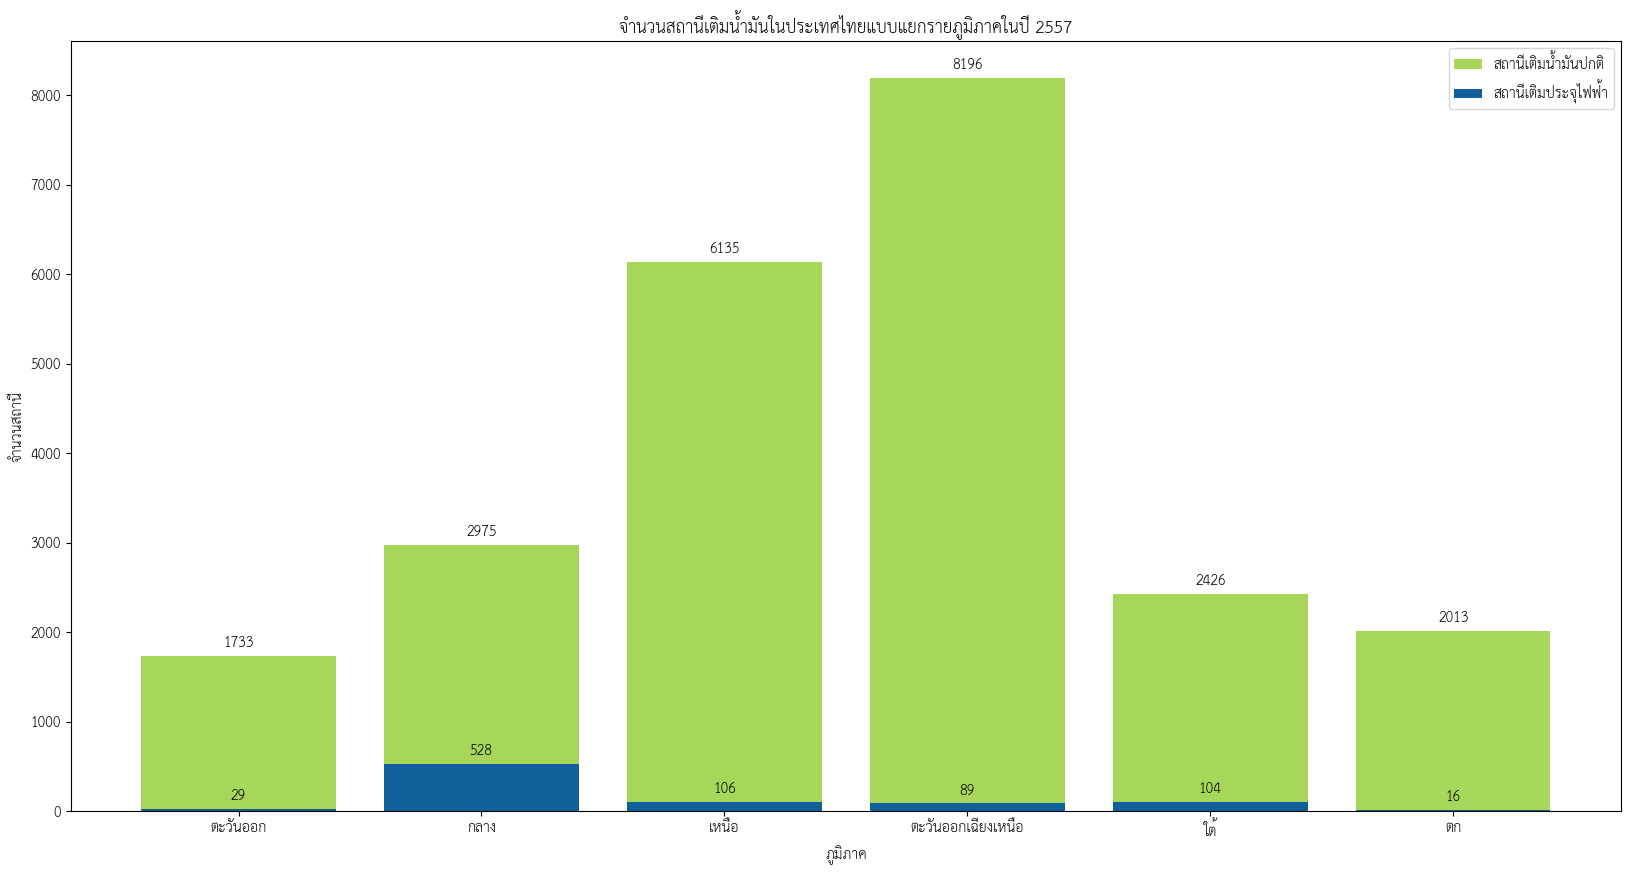

In [ ]:
conti = ['ตะวันออก','กลาง','เหนือ','ตะวันออกเฉียงเหนือ','ใต้','ตก']
num_list = [int(each_con.loc[x]['all_in_provide']) for x in each_con.index ]
en_list = [int(en_station.loc[x]['en_real']) for x in each_con.index ]
plt.style.use('default')
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

plt.subplots(figsize=(20,10))

plt.bar(each_con['Continent'],each_con['all_in_provide'] ,color="#a6d75b" ,label = "สถานีเติมน้ำมันปกติ")
plt.bar(en_station['Continent'],en_station['en_real'] ,color="#115f9a",label = "สถานีเติมประจุไฟฟ้า")

for i in range(len(conti)):
  plt.text(each_con['Continent'][i],num_list[i]+100,num_list[i],ha='center',color = "black")
  plt.text(each_con['Continent'][i],en_list[i]+100,en_list[i],ha='center',color = "black")

plt.xticks(each_con['Continent'],conti)
plt.title("จำนวนสถานีเติมน้ำมันในประเทศไทยแบบแยกรายภูมิภาคในปี 2557")
plt.xlabel("ภูมิภาค")
plt.ylabel("จำนวนสถานี")

plt.legend()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None
NE = each_con[each_con["Continent"]=="NE"]
del NE["Continent"]
del NE["all_in_provide"]
NE["company"] = NE["PTT"]+NE["Shell"]+NE["Esso"]+NE["Chevron"]+NE["Bangchak"]+NE["Thai Oil"]+NE["RPCG"]+NE["Susco"]+NE["Susco Dealer"]+NE["PTG"]+NE["IRPC"]+NE["PTT Oil and Retail Business"]+NE["PC"]+NE["Saengthong"]+NE["Picnic"]+NE["WP energy"]+NE["Unique Gas"]+NE["Saim Gas"]+NE["PAP"]+NE["NS Gas"]+NE["Takuni"]+NE["Orchid Gas LPG Station"]+NE["Thai Gas"]
NE_2 = NE[["company","Other"]]

MD = each_con[each_con["Continent"]=="MD"]
del MD["Continent"]
del MD["all_in_provide"]
MD["company"] = MD["PTT"]+MD["Shell"]+MD["Esso"]+MD["Chevron"]+MD["Bangchak"]+MD["Thai Oil"]+MD["RPCG"]+MD["Susco"]+MD["Susco Dealer"]+MD["PTG"]+MD["IRPC"]+MD["PTT Oil and Retail Business"]+MD["PC"]+MD["Saengthong"]+MD["Picnic"]+MD["WP energy"]+MD["Unique Gas"]+MD["Saim Gas"]+MD["PAP"]+MD["NS Gas"]+MD["Takuni"]+MD["Orchid Gas LPG Station"]+MD["Thai Gas"]
MD_2 = MD[["company","Other"]]


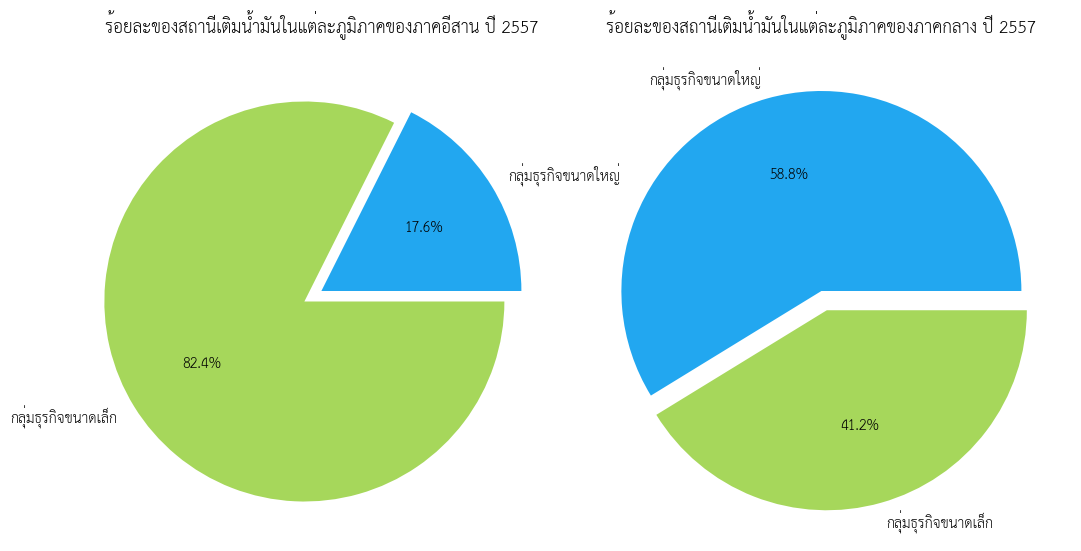

In [ ]:
# Plot pie chart compare between NE and MD
ee = (0,0.1)
comp = ["กลุ่มธุรกิจขนาดใหญ่","กลุ่มธุรกิจขนาดเล็ก"]
NE_2 = NE_2.values.tolist()[0]
MD_2 = MD_2.values.tolist()[0]

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(NE_2,autopct="%.1f%%",explode=ee,labels = comp,colors=['#22a7f0', '#a6d75b'])
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(MD_2,autopct="%.1f%%",explode=ee,labels = comp,colors=['#22a7f0', '#a6d75b'])
ax1.set_title('ร้อยละของสถานีเติมน้ำมันในแต่ละภูมิภาคของภาคอีสาน ปี 2557')
ax2.set_title('ร้อยละของสถานีเติมน้ำมันในแต่ละภูมิภาคของภาคกลาง ปี 2557')
plt.show()